## **Deskripsi Dataset**<br>
Dataset yang digunakan dalam projek ini adalah data tentang potabilitas air. Data ini terdiri dari 10 atribut atau fitur yang semuanya bersifat numerik (angka). Dataset ini digunakan untuk memprediksi dan klasifikasi potabilitas air berdasarkan berbagai atribut atau fitur yang diukur atau diamati, berikut adalah atribut/fitur yang terdapat pada dataset:
- pH: Tingkat pH air.
- Hardness: Ukuran kandungan mineral di dalam air.
- Solids: Total padatan terlarut di dalam air.
- Chloramines: Konsentrasi kloramin di dalam air.
- Sulfate: Konsentrasi sulfat di dalam air.
- Conductivity: Daya hantar listrik air.
- Organic_carbon: Kandungan karbon organik dalam air.
- Trihalomethanes: Konsentrasi trihalometana di dalam air.
- Turbidity: Tingkat kekeruhan, ukuran kejernihan air.
- Potability (variabel target): Menunjukkan potensi air dengan nilai 1 (dapat diminum) dan 0 (tidak dapat diminum).

**Tujuan:** <br>
* Membangun model Neural Networks Multilayer Pereptron yang mampu memprediksi klasifikasi potabilitas air.
* Mengidentifikasi kinerja model yang dibangun terhadap dataset potabilitas air.
* Menganalisis fitur-fitur yang berpengaruh terhadap prediksi potabilitas air.

## **Pengumpulan Data**

**Mengimport library**

In [9]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

**Memanggil dataset**

In [10]:
# Memanggil dataset
dataset = pd.read_csv('water_potability.csv')
data = pd.DataFrame(dataset)

In [11]:
# Menampilkan sebagian isi dari dataset
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


**Melihat atribut pada data**

In [12]:
# Melihat variabel dalam dataset
data.keys()

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

**Menampilkan jumlah data yang kosong**

In [13]:
# dalam dataset ini terdapat value kosong seperti "---", maka terlebih dahulu kita ganti dengan null
# df_cleaned: pengecekan missing data
df_cleaned = data.replace('---', np.nan)
df_cleaned = data.replace('nan', np.nan)
df_cleaned = data.replace('TIDAK ADA DATA', np.nan)

# Mencetak jumlah data kosong pada masing-masing variabel
df_cleaned.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Menampilkan jumlah data yang terduplikasi**

In [14]:
# Untuk mengetahui apakah terdapat data yang terduplikasi atau tidak
print('Jumlah data yang terduplikasi:',df_cleaned.duplicated().sum())

Jumlah data yang terduplikasi: 0


**Menampilkan jumlah data yang kosong (setelah dibersihkan)**

In [15]:
# Menampilkan jumlah data kosong setelah dibersihkan
# df_clean = data bersih
df_clean = df_cleaned.dropna(axis=0)
df_clean.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Menampilkan sebagian data yang sudah dibersihkan**

In [16]:
# Menampilkan sebagian isi data yang sudah dibersihkan
df_clean.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


**Menampilkan grafik keseimbangan data (sebelum menghapus outlier)**



In [17]:
# Menampilkan grafik keseimbangan data
num_rows = 2
num_cols_per_row = (len(df_clean.columns) + num_rows - 1) // num_rows
fig = make_subplots(rows=num_rows, cols=num_cols_per_row, subplot_titles=df_clean.columns)

for i, col_name in enumerate(df_clean.columns):
    row = (i // num_cols_per_row) + 1
    col = (i % num_cols_per_row) + 1
    fig.add_trace(go.Box(y=data[col_name], name=col_name), row=row, col=col)

    outliers = df_clean[col_name][
        (data[col_name] < data[col_name].quantile(0.25) - 1.5 * (data[col_name].quantile(0.75) - data[col_name].quantile(0.25))) |
        (data[col_name] > data[col_name].quantile(0.75) + 1.5 * (data[col_name].quantile(0.75) - data[col_name].quantile(0.25)))
    ]
    fig.add_trace(go.Scatter(x=[col_name] * len(outliers), y=outliers, mode='markers', marker=dict(color='red', size=8)),
                  row=row, col=col)

fig.update_layout(height=800, width=1200,
                  showlegend=False, margin=dict(l=20, r=20, t=40, b=20))
fig.show()

**Menampilkan grafik keseimbangan data (setelah menghapus outlier)**

In [18]:
# Menampilkan grafik keseimbangan data (setelah menghapus outlier)
columns = ['Hardness', 'Solids', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

# Menghapus outlier
data_cleaned = remove_outliers_iqr(df_clean, columns)

fig = make_subplots(rows=num_rows, cols=num_cols_per_row, subplot_titles=data_cleaned.columns)
num_rows = 2
num_cols_per_row = (len(data_cleaned.columns) + num_rows - 1) // num_rows

for i, col_name in enumerate(data_cleaned.columns):
    row = (i // num_cols_per_row) + 1
    col = (i % num_cols_per_row) + 1
    fig.add_trace(go.Box(y=data_cleaned[col_name], name=col_name), row=row, col=col)

    outliers = data_cleaned[col_name][
        (data_cleaned[col_name] < data_cleaned[col_name].quantile(0.25) - 1.5 * (data_cleaned[col_name].quantile(0.75) - data_cleaned[col_name].quantile(0.25))) |
        (data_cleaned[col_name] > data_cleaned[col_name].quantile(0.75) + 1.5 * (data_cleaned[col_name].quantile(0.75) - data_cleaned[col_name].quantile(0.25)))
    ]
    fig.add_trace(go.Scatter(x=[col_name] * len(outliers), y=outliers, mode='markers', marker=dict(color='red', size=8)),
                  row=row, col=col)

fig.update_layout(height=800, width=1200,
                  showlegend=False, margin=dict(l=20, r=20, t=40, b=20))
fig.show()

**Mengacak data**

In [19]:
# Pengacakan data
# data_cleaned: data yang sudah dibersihkan
data_acak = shuffle(data_cleaned, random_state=42)

In [20]:
# Data yang siap digunakan
# Menampilkan sebagian isi dari data_acak
data_acak.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
426,6.887864,173.325022,19947.924178,7.488703,334.098023,441.002612,10.780501,89.005492,5.454488,0
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,1
872,6.791697,175.894346,21467.950866,7.101224,349.492177,427.239740,12.556983,55.253912,2.817391,0
1416,6.966835,158.043065,12256.678287,7.105619,371.517435,382.443863,14.408080,78.100735,2.957441,0
2189,2.558103,147.490575,21316.506728,9.142234,312.054239,406.372019,11.519669,83.277583,2.817258,0


**Memisahkan dataset menjadi data_training dan data_test dengan perbandingan 80:20**

In [21]:
# Memisahkan dataset menjadi training data dan test data dengan rasio 80:20
data_train, data_test = train_test_split(data_acak, test_size = 0.2, random_state = 42)

# Menampilkan jumlah data pada setiap bagian
print("Jumlah data training:", len(data_train))
print("Jumlah data test:", len(data_test))

Jumlah data training: 1480
Jumlah data test: 370


In [22]:
# Menampilkan sebagian data_train
data_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1928,7.425102,204.486282,18608.940874,7.434493,318.183297,338.935271,16.244755,94.605311,2.558773,1
2379,7.089184,179.045838,21065.663658,7.471614,377.778024,571.575505,12.623104,85.241179,3.266029,1
1187,8.447404,163.949905,19583.057349,6.433184,334.655886,547.023830,18.238711,45.668318,5.218307,1
3212,5.913755,175.326062,12044.624691,8.368785,347.880372,380.967166,12.530827,65.194053,4.023776,1
1262,6.934504,176.969431,15323.408822,5.666870,369.341803,435.948386,21.813160,104.747700,3.875238,0


In [23]:
# Menampilkan sebagian data_test
data_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3135,7.274213,197.660949,27198.432591,7.797840,304.849979,300.019910,14.611600,66.608891,4.710256,1
877,5.090035,174.266357,34094.057177,6.741909,376.663608,526.361082,17.107563,48.546257,4.838862,0
3074,8.558389,198.888868,8535.402956,4.796666,321.403477,453.571163,14.351624,74.326204,3.946228,0
3038,5.174896,205.519019,12871.551220,7.099599,365.684401,501.193950,20.558672,77.123457,3.445028,0
2091,7.249257,223.703540,24311.905794,7.392517,275.622487,306.782231,9.697257,77.199646,4.361486,0


# **Pra-Pemrosesan Data**

 **Transformasi data (_feature scalling_) dengan normalisasi**

In [24]:
print("Dataset sebelum dinormalisasi:")
data_acak.head()

Dataset sebelum dinormalisasi:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
426,6.887864,173.325022,19947.924178,7.488703,334.098023,441.002612,10.780501,89.005492,5.454488,0
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,1
872,6.791697,175.894346,21467.950866,7.101224,349.492177,427.239740,12.556983,55.253912,2.817391,0
1416,6.966835,158.043065,12256.678287,7.105619,371.517435,382.443863,14.408080,78.100735,2.957441,0
2189,2.558103,147.490575,21316.506728,9.142234,312.054239,406.372019,11.519669,83.277583,2.817258,0


In [25]:
# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data
normalized_data = scaler.fit_transform(data_acak)

# Hasil normalisasi akan menjadi array NumPy, ubah kembali ke DataFrame
df_normal = pd.DataFrame(normalized_data, columns=data_cleaned.columns)

# Menampilkan DataFrame hasil normalisasi
print("Dataset setelah dinormalisasi:")
df_normal.head()

Dataset setelah dinormalisasi:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.483599,0.351579,0.447458,0.541428,0.507028,0.530879,0.298825,0.764649,0.851563,0.0
1,0.465831,0.450268,0.742144,0.479524,0.505794,0.299260,0.513506,0.513683,0.641087,1.0
2,0.476616,0.367845,0.482112,0.507024,0.583270,0.500357,0.395959,0.364354,0.229518,0.0
3,0.489333,0.254830,0.272112,0.507414,0.692355,0.401013,0.497173,0.635318,0.262553,0.0
4,0.169222,0.188024,0.478659,0.688246,0.397851,0.454079,0.339241,0.696715,0.229487,0.0


In [26]:
df_normal

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.483599,0.351579,0.447458,0.541428,0.507028,0.530879,0.298825,0.764649,0.851563,0.0
1,0.465831,0.450268,0.742144,0.479524,0.505794,0.299260,0.513506,0.513683,0.641087,1.0
2,0.476616,0.367845,0.482112,0.507024,0.583270,0.500357,0.395959,0.364354,0.229518,0.0
3,0.489333,0.254830,0.272112,0.507414,0.692355,0.401013,0.497173,0.635318,0.262553,0.0
4,0.169222,0.188024,0.478659,0.688246,0.397851,0.454079,0.339241,0.696715,0.229487,0.0
...,...,...,...,...,...,...,...,...,...,...
1845,0.458211,0.615374,0.273793,0.524682,0.782988,0.584880,0.917169,0.000000,0.373141,1.0
1846,0.565717,0.506436,0.519422,0.735538,0.451738,0.430497,0.438649,0.525606,0.317051,1.0
1847,0.469416,0.523015,0.836969,0.296222,0.243281,0.388215,0.392037,0.394770,0.258938,1.0
1848,0.485560,0.560023,0.228493,0.566512,0.458913,0.709000,0.593714,0.518452,0.269906,0.0


In [27]:
#hasilkan nilai biner menggunakan Sklearn
from sklearn.preprocessing import OneHotEncoder
# membuat instance one-hot-encoder
One_enc = OneHotEncoder(handle_unknown='ignore')
#Melewati variabel gender
enc_df = pd.DataFrame(One_enc.fit_transform(df_normal[['Potability']]).toarray())
# gabung dengan kumpulan data penumpang pada nilai kunci
Enc_df= df_normal.join(enc_df)
Enc_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,0,1
0,0.483599,0.351579,0.447458,0.541428,0.507028,0.530879,0.298825,0.764649,0.851563,0.0,1.0,0.0
1,0.465831,0.450268,0.742144,0.479524,0.505794,0.299260,0.513506,0.513683,0.641087,1.0,0.0,1.0
2,0.476616,0.367845,0.482112,0.507024,0.583270,0.500357,0.395959,0.364354,0.229518,0.0,1.0,0.0
3,0.489333,0.254830,0.272112,0.507414,0.692355,0.401013,0.497173,0.635318,0.262553,0.0,1.0,0.0
4,0.169222,0.188024,0.478659,0.688246,0.397851,0.454079,0.339241,0.696715,0.229487,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1845,0.458211,0.615374,0.273793,0.524682,0.782988,0.584880,0.917169,0.000000,0.373141,1.0,0.0,1.0
1846,0.565717,0.506436,0.519422,0.735538,0.451738,0.430497,0.438649,0.525606,0.317051,1.0,0.0,1.0
1847,0.469416,0.523015,0.836969,0.296222,0.243281,0.388215,0.392037,0.394770,0.258938,1.0,0.0,1.0
1848,0.485560,0.560023,0.228493,0.566512,0.458913,0.709000,0.593714,0.518452,0.269906,0.0,1.0,0.0


## **Membangun Model MLP 2 Lapis**

In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = tf.keras.Sequential([
        tf.keras.layers.Dense(32),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')])

In [29]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

* Apa metrik untuk mengukur performa model: accuracy
* Fungsi rugi (cost function): binary_crossentropy
* Optimizer : SGD

## **Melatih Model**

In [30]:
# Data latih
x_train = data_train[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y_train = data_train['Potability']

# Data uji
x_test = data_test[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y_test = data_test['Potability']

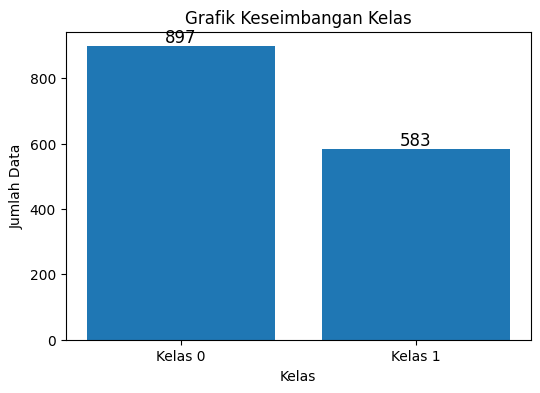

In [31]:
# Mengecek keseimbangan kelas dan menampilkan grafik
class_counts = data_train['Potability'].value_counts()
plt.figure(figsize=(6, 4))
bars = plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Grafik Keseimbangan Kelas')

# Menambahkan keterangan jumlah data di tengah setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.xticks(class_counts.index, labels=['Kelas 0', 'Kelas 1'])
plt.show()

Epoch 1/1000


D:\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4029 - loss: 727.1971 - val_accuracy: 0.6081 - val_loss: 61.2428
Epoch 2/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5598 - loss: 28.4598 - val_accuracy: 0.6054 - val_loss: 4.3708
Epoch 3/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5507 - loss: 4.3816 - val_accuracy: 0.5838 - val_loss: 1.4136
Epoch 4/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4836 - loss: 4.0910 - val_accuracy: 0.6054 - val_loss: 1.9789
Epoch 5/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5110 - loss: 2.6345 - val_accuracy: 0.6027 - val_loss: 2.0801
Epoch 6/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5480 - loss: 1.6283 - val_accuracy: 0.6054 - val_loss: 3.8296
Epoch 7/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5716 - loss: 2.9259 - val_accuracy: 0.5405 - val_loss: 1.0767
Epoch 8/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5385 - loss: 1.5055 - val_accuracy: 0.4865 - va

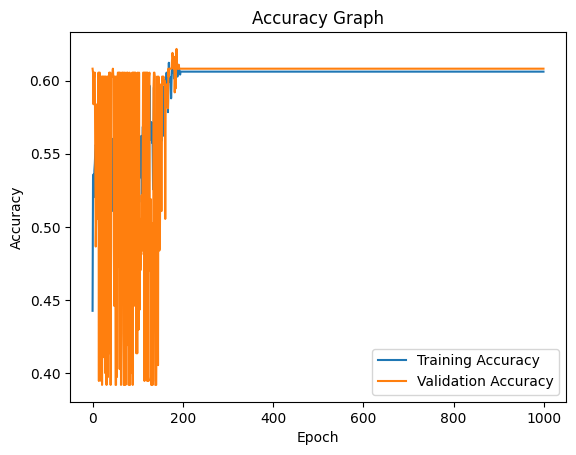

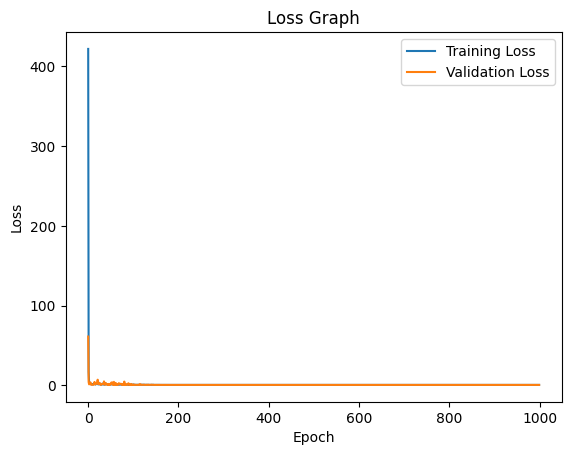

In [44]:
# Melatih model dengan data latih
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Inisialisasi model
model = Sequential()

# Tambahkan lapisan input
model.add(Dense(units=9, activation='relu', input_dim=9))

# Tambahkan lapisan tersembunyi
model.add(Dense(units=32, activation='relu'))

# Tambahkan lapisan output dengan aktivasi softmax untuk masalah klasifikasi
model.add(Dense(units=1, activation='sigmoid'))

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan memonitor akurasi dan kerugian pada data validasi
history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test))

# Menampilkan grafik akurasi selama pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Menampilkan grafik kerugian selama pelatihan
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi model pada data validasi
#y_pred_test = model.predict(x_test)
#y_pred_test = (y_pred_test > 0.5).astype(int)
#accuracy = accuracy_score(y_test, y_pred_test)
#print(f'Akurasi pada data validasi: {accuracy:.2f}')

## **Evaluasi Model**

In [47]:
# Membuat prediksi untuk data_train dan data_test
y_test_pred = model.predict(x_test)

y_test_preds = []

for i in y_test_pred:
  if i <=0.5:
    i = 0
    y_test_preds.append(i)
  else:
    i = 1
    y_test_preds.append(i)

# Menghitung selisih antara prediksi dan target
squared_error = (np.array(y_test).reshape(-1,1) - np.array(y_test_preds).reshape(-1,1)) ** 2

# Menghitung MSE
mse = np.mean(squared_error)

print(f'Mean Squared Error (MSE): {mse:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.3919


In [48]:
# Lakukan prediksi pada data pengujian
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_preds)
print("Accuracy:", accuracy)

Accuracy: 0.6081081081081081


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

# print prediction results
print(classification_report(np.array(y_test).reshape(-1,1), np.array(y_test_preds).reshape(-1,1)))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       225
           1       0.00      0.00      0.00       145

    accuracy                           0.61       370
   macro avg       0.30      0.50      0.38       370
weighted avg       0.37      0.61      0.46       370



D:\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Confusion Matrix**

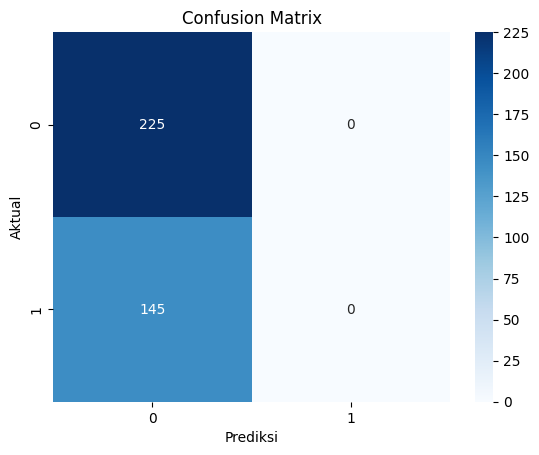

In [50]:
# Import library
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_test_preds)

# Visualisasi confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [51]:
# Evaluate the model
y_test_pred = model.predict(x_test)
y_test_pred = (y_test_pred > 0.5).astype(int)
print(classification_report(y_test, y_test_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       225
           1       0.00      0.00      0.00       145

    accuracy                           0.61       370
   macro avg       0.30      0.50      0.38       370
weighted avg       0.37      0.61      0.46       370



D:\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## **Prediksi**

In [52]:
# Atribut data
atribut = [
    "pH",
    "Hardness",
    "Solids",
    "Chloramines",
    "Sulfate",
    "Conductivity",
    "Organic_carbon",
    "Trihalomethanes",
    "Turbidity",
]

while True:
    print("\nMasukkan data baru untuk prediksi potabilitas air (tekan Enter tanpa input untuk keluar):")
    try:
        # Input data baru
        nilai_baru = []
        for i in range(len(atribut)):
            nilai = input(f"{atribut[i]}: ")
            if nilai == "":
                raise ValueError("Stop Input")
            nilai_baru.append(float(nilai))

        nilai_baru = np.array([nilai_baru])

        # Menampilkan keterangan untuk setiap atribut
        print("\nData baru yang dimasukkan:")
        for i, nilai in enumerate(nilai_baru[0]):
            print(f"- {atribut[i]}: {nilai}")

        # Prediksi potabilitas air
        y_baru_pred = model.predict(nilai_baru)

        if y_baru_pred[0] <= 0.5:
            hasil_prediksi = "Tidak dapat diminum"
        else:
            hasil_prediksi = "Dapat diminum"

        # Menampilkan hasil prediksi secara deskriptif
        print("\nHasil Prediksi:")
        print(f"Berdasarkan data yang dimasukkan, air ini {hasil_prediksi}.")
        print("\n----------------------------------------")

    except ValueError as e:
        if str(e) == "Stop Input":
            print("\nProses selesai. Terima kasih!")
            break
        else:
            print("Input tidak valid, silakan coba lagi.")


Masukkan data baru untuk prediksi potabilitas air (tekan Enter tanpa input untuk keluar):

Data baru yang dimasukkan:
- pH: 7.2
- Hardness: 174.4
- Solids: 33991.6
- Chloramines: 9.5
- Sulfate: 259.1
- Conductivity: 435.1
- Organic_carbon: 16.2
- Trihalomethanes: 81.6
- Turbidity: 4.4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Hasil Prediksi:
Berdasarkan data yang dimasukkan, air ini Tidak dapat diminum.

----------------------------------------

Masukkan data baru untuk prediksi potabilitas air (tekan Enter tanpa input untuk keluar):

Data baru yang dimasukkan:
- pH: 5.6
- Hardness: 184.7
- Solids: 17527.7
- Chloramines: 5.3
- Sulfate: 339.0
- Conductivity: 409.4
- Organic_carbon: 15.1
- Trihalomethanes: 31.9
- Turbidity: 3.2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Hasil Prediksi:
Berdasarkan data yang dimasukkan, air ini Tidak dapat diminum.

----------------------------------------

Masukkan data baru untuk prediksi potabilitas air (tekan Enter tanpa input untuk keluar):

Data baru yang

## **Visualisasi Hasil**

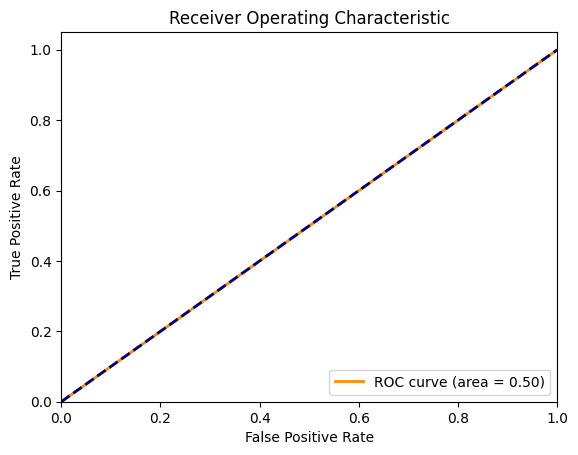

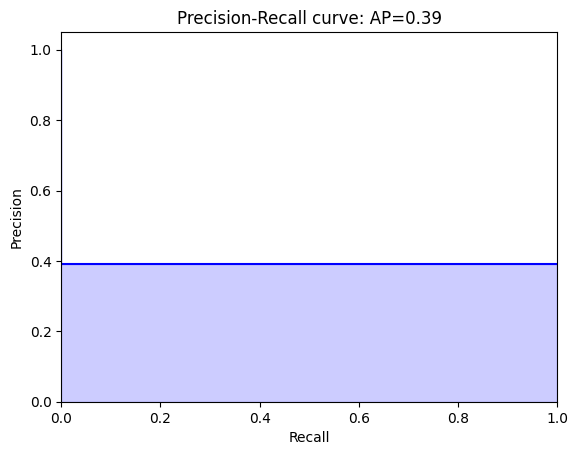

In [39]:
import numpy as np
from sklearn.metrics import  roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Kurva Presisi-Recall
precision, recall, _ = precision_recall_curve(y_test, y_test_preds)
average_precision = average_precision_score(y_test, y_test_preds)

plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.show()


## **Arsitektur Model**

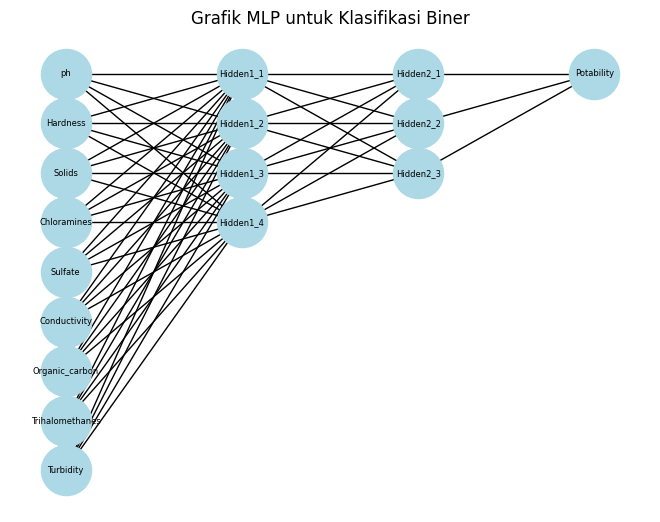

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat objek graf
G = nx.Graph()

# Tambahkan node untuk lapisan input
input_layer = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
G.add_nodes_from(input_layer, layer='Input')

# Tambahkan node untuk lapisan tersembunyi pertama
hidden1_layer = ['Hidden1_' + str(i) for i in range(1, 5)]
G.add_nodes_from(hidden1_layer, layer='Hidden1')

# Tambahkan node untuk lapisan tersembunyi kedua
hidden2_layer = ['Hidden2_' + str(i) for i in range(1, 4)]
G.add_nodes_from(hidden2_layer, layer='Hidden2')

# Tambahkan node untuk lapisan output
output_layer = ['Potability']
G.add_nodes_from(output_layer, layer='Output')

# Menghubungkan node-node antar lapisan
for node1 in input_layer:
    for node2 in hidden1_layer:
        G.add_edge(node1, node2)
for node1 in hidden1_layer:
    for node2 in hidden2_layer:
        G.add_edge(node1, node2)
for node1 in hidden2_layer:
    for node2 in output_layer:
        G.add_edge(node1, node2)

# Tentukan posisi node-node pada plot
pos = {}
layers = ['Input', 'Hidden1', 'Hidden2', 'Output']

# Menentukan posisi node pada setiap lapisan
for layer in layers:
    nodes = [node for node, attr in G.nodes(data=True) if attr['layer'] == layer]
    y_positions = range(len(nodes))
    x_position = layers.index(layer)  # Lapisan yang sesuai
    pos.update((node, (x_position, -y)) for node, y in zip(nodes, y_positions))

# Gambar node-node
nx.draw(G, pos, with_labels=True, node_size=1300, node_color='lightblue', font_size=6, font_color='black')

# Tampilkan plot
plt.title("Grafik MLP untuk Klasifikasi Biner")
plt.axis('off')
plt.show()


## **c. Evaluasi Hasil**<br>
Evaluasi hasil pada model didapatkan tingkat akurasi sebesar 61%. Tingkat akurasi sebesar 61% mengindikasikan bahwa model yang telah dibuat melakukan prediksi dengan tepat sekitar 61% dari seluruh data yang ada dalam dataset. Tetapi hasil akurasi ini belum sesuai harapan, perlu mengumpulkan lebih banyak data atau melakukan pengujian dengan berbagai fitur-fitur yang berpengaruh terhadap hasil prediksi.